In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

print ("The libraries have been loaded.")

The libraries have been loaded.


In [2]:
data = pd.read_csv('./housing.csv')

#this function returns a pandas DataFrame object containing all the data

In [3]:
#Descrevendo as variáveis, para identificar dados que possivelmente precisem de alterações ou manipulações para gerar novos dados.
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
data.info()
#this step uses the previous functions of fetching and loading data to provide a visualization through pandas library

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


At this point, we have brief visualization of the numerical and non numerical data - therefore, one must ensure that all instance of the given dataset contains only numerical attributes. The present dataset contains non numerical attributes, to find out more about the categories, we use the method value_counts() over the "ocean_proximity"

Also, the total_bedrooms atrribute contains only 20433 non-null values. 207 districts are missing this feature, in order to analyse this attribute, the non numerical attributes must be replaced for float64.

In [5]:
#Using a technique called feature engineering, witch is mainly used for creating new variables using others that already exist in the database. The goal is to simplify and speed up data transformations while also enhancing model accuracy.
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


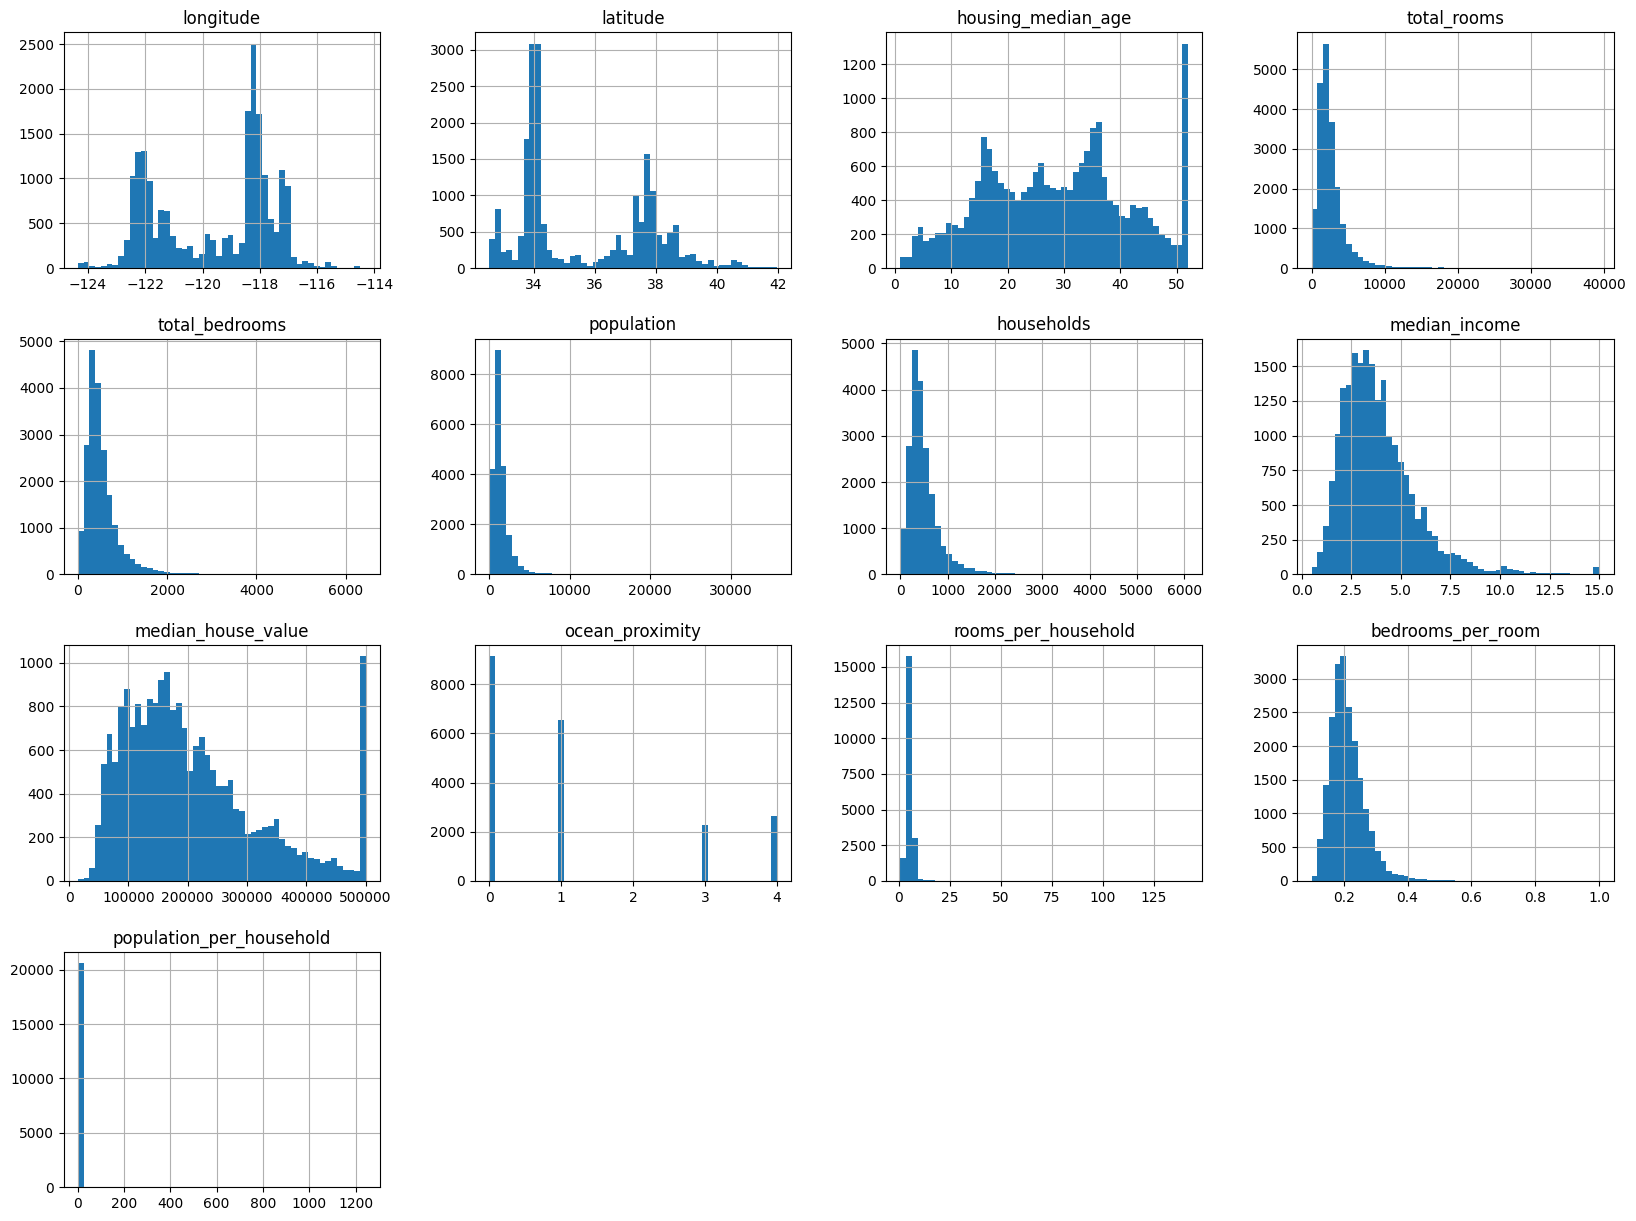

In [44]:
#Data analysis is one of the most important part of Machine Learning. Getting used to doing plots and visualizing data will help you know not only the quantity of them and the way that they variate, but how important they are for the dependent variable y.
data.hist(bins=50, figsize=(20,15))
plt.show()

# The output is one histogram for each numerical attribute

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

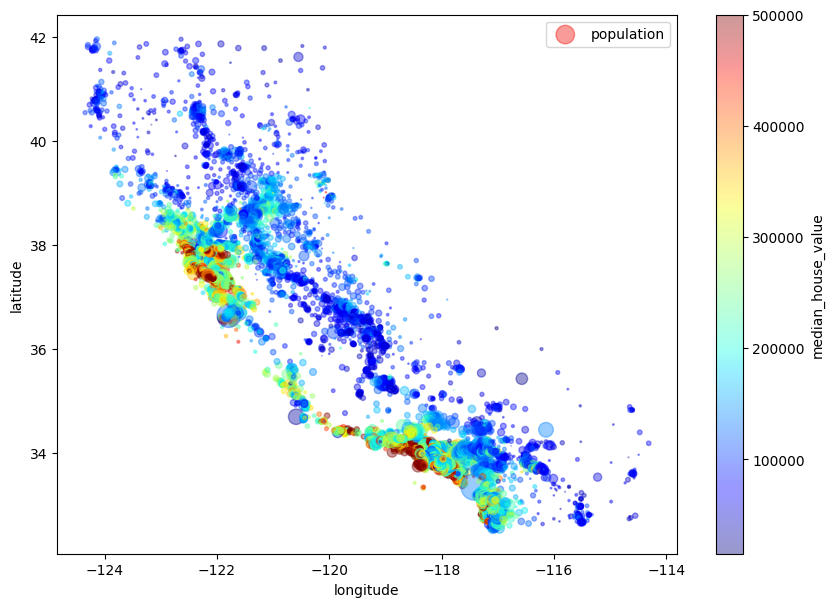

In [7]:
# In this plot we are showing where it seems to be the most expensive region in California, using the data that was collected and using latitude and longitude, we can plot it into the map. The model that we want to create will serve for us to predict values for areas that were not marked already in the map. Knowing that the have a good data quality, we can make really precise predictions.

data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=data["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)


In [43]:
#Working with categorical variables and transforming it to numerical, on our way to make the data ready for the ML algorithm.
#Defining a variable related to the library
ocean = LabelEncoder()
#Using the function in the column that we want to transform. This line of code will transform data, for example: when the string data is inland, near ocean or near bay it will convert to 1,2,3.
data['ocean_proximity'] = ocean.fit_transform(data['ocean_proximity'])
print(data['ocean_proximity'].value_counts())
#In this line we want to make a column for every variable that haves into the ocean_proximity label, witch is inland, near_ocean, near_bay and island. For example, if our row is inland, we want inland to be valued as 1 and the rest as 0. The value [9] is the position of the ocean proximity position in the column
ocean_hot = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [9])], remainder='passthrough')
#creating a new data with the categorical data transformed
new_data = ocean_hot.fit_transform(data)
#Creating a DataFrame
new_data = pd.DataFrame(new_data)
#Defining its columns
new_data.columns =['<1H_OCEAN', 
    'INLAND', 
    'NEAR_OCEAN',
    'NEAR_BAY', 
    'ISLAND', 
    'longitude', 
    'latitude', 
    'housing_median_age', 
    'total_rooms', 
    'total_bedrooms', 
    'population', 
    'households', 
    'median_income',
    'median_house_value',
    'rooms_per_household',
    'bedrooms_per_room',
    'population_per_household']

new_data

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64


,<1H_OCEAN,INLAND,NEAR_OCEAN,NEAR_BAY,ISLAND,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606
20636,0.0,1.0,0.0,0.0,0.0,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807
20637,0.0,1.0,0.0,0.0,0.0,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635
20638,0.0,1.0,0.0,0.0,0.0,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209


In [9]:
#Dropping independent and dependent variables
new_data = new_data.dropna()
x = new_data.drop('median_house_value', axis =1)
y= new_data['median_house_value']

In [10]:
#Searching for the best model
#Creating train and test variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# this line of code splits the full dataset named into three subsets: train_set, test_set and the rest of original housing set;
# each of the sliced sets (train_set & test_set) have 20% the size of the original dataset;
# the parameter random_state controls the shuffling applied to the data before applying the split;

#Small function to display the scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
#calling the library
lr = LinearRegression()
#Fitting the training data
lr.fit(x_train,y_train)
#Some data that we want to use as benchmark
some_data = x_test.iloc[:5]
some_label = y_test.iloc[:5]
#printing some informati on about the prediction
print(f'Predictions:  {(lr.predict(some_data))}')
#actual values
print(f'Labels: {list(some_label)}')
#benchmarking the values using the the test set
y_pred = lr.predict(x_test)
lr_mse = mean_squared_error(y_test,y_pred)
lr_rse = np.sqrt(lr_mse)
display_scores(lr_rse)
#This is an example of a model underfitting the training data, knowing that the prices of a house range from $120.000 to $265.000 and we are getting a $69.000 deviation. We can now find other models that can solve better the problem


Predictions:  [212233.59330796 146168.34886807 203451.58295572 177543.87775204
 199126.6976565 ]
Labels: [245800.0, 137900.0, 218200.0, 220800.0, 170500.0]
Scores: 69042.79968866646
Mean: 69042.79968866646
Standard deviation: 0.0


In [11]:
lin_scores = cross_val_score(lr, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [64237.27680848 63388.15155272 68169.70187005 70198.47741099
 66970.47192028 65998.61384366 74532.8294136  69701.82212469
 67168.6187997  68784.05069946]
Mean: 67915.00144436365
Standard deviation: 3035.8285446959676


In [12]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)
ytree_pred = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, ytree_pred)
tree_rse = np.sqrt(tree_mse)

In [13]:
print(f'Relative Standard Error: {tree_rse}')
scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)
#We are still not getting good values from the predictors, with the value difference being over $70.000 dolars

Relative Standard Error: 68837.31024567499
Scores: [68059.17703103 66343.23234022 77807.04458439 74720.48252102
 69664.03155604 67670.36063105 67734.11165674 71189.88542075
 68471.75344438 70495.82815537]
Mean: 70215.59073409882
Standard deviation: 3384.9432051332296


In [14]:
dectree= DecisionTreeRegressor()
dectree.fit(x_train,y_train)
some_data = x_test.iloc[:5]
some_label = y_test.iloc[:5]
print(f'Predictions:  {(dectree.predict(some_data))}')
print(f'Labels: {list(some_label)}')

scores = cross_val_score(dectree, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Predictions:  [220000. 142100. 236500. 134500. 189800.]
Labels: [245800.0, 137900.0, 218200.0, 220800.0, 170500.0]
Scores: [68646.71426223 66187.62154871 80155.98322123 76780.02834606
 69683.68527976 67567.57237751 68400.67846067 71723.20843067
 70135.81591875 71728.76668347]
Mean: 71101.0074529048
Standard deviation: 4097.649731563992


In [15]:
#This seems to be the best model!
forest = RandomForestRegressor()
forest.fit(x_train,y_train)
forest_scores = cross_val_score(forest, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

#Searching for accuracy and loss on every hyperparameter to find the one with the best performance

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]}, {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,2,4]},
]

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

#This model stil have a deviation of $49.000 dolars, but seems to be the best! The idea is to find the model that adapts itself the best for the data that is being analysed, in this case we are still not using neural networks or suported vector machines, witch can lead to a higher precision!

Scores: [47125.8268119  47004.28216034 52725.45803073 53698.08924341
 49900.93942427 46923.35445778 49828.67306794 50998.51166514
 48760.69701463 50638.67177757]
Mean: 49760.45036537103
Standard deviation: 2240.7823394338993
{'max_features': 8, 'n_estimators': 30}
62936.98224065975 {'max_features': 2, 'n_estimators': 3}
55227.49805023521 {'max_features': 2, 'n_estimators': 10}
52108.69401737256 {'max_features': 2, 'n_estimators': 30}
59691.40499464038 {'max_features': 4, 'n_estimators': 3}
52144.76118974156 {'max_features': 4, 'n_estimators': 10}
50151.391150733325 {'max_features': 4, 'n_estimators': 30}
59029.54935217664 {'max_features': 6, 'n_estimators': 3}
51420.20158466734 {'max_features': 6, 'n_estimators': 10}
49598.22801186936 {'max_features': 6, 'n_estimators': 30}
57972.509730508384 {'max_features': 8, 'n_estimators': 3}
51914.5888424686 {'max_features': 8, 'n_estimators': 10}
49439.82322200136 {'max_features': 8, 'n_estimators': 30}
62413.11411816323 {'bootstrap': False, 'ma

In [45]:
new_data.tail()

,<1H_OCEAN,INLAND,NEAR_OCEAN,NEAR_BAY,ISLAND,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
20635,0.0,1.0,0.0,0.0,0.0,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606
20636,0.0,1.0,0.0,0.0,0.0,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807
20637,0.0,1.0,0.0,0.0,0.0,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635
20638,0.0,1.0,0.0,0.0,0.0,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209
20639,0.0,1.0,0.0,0.0,0.0,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,5.254717,0.221185,2.616981


In [52]:
new_predict = np.array([[0, 1, 0, 0, 0, -121.09, 39.48, 25, 1665, 374, 845, 330, 1.556, 5, 0.22, 2.5]])
pred = forest.predict(new_predict)
print(pred)

[76677.]


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
